In [1]:
from fastai.vision.all import *
from torchvision.models import *

from utils import *
import sys

import pickle
import dill

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
with open('models/M3_RN_ds3.pickle', 'rb') as f:
    learn = pickle.load(f)
    
learn = dill.loads(learn)

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

#this function is not necessary and unfortunately sometimes has a bug. 
#But when it works, it shows relatively well the examples that the model predicts.
learn.show_results()

In [4]:
path_wiki = 'data/watches/ds3_crown/cleandata.csv'
path_imdb = 'data/watches/ds3_crown/images/'
img_size  = 255

In [5]:
df = pd.read_csv(path_wiki, index_col=0)
df_train, df_test = train_test_split(df, test_size=0.1, random_state=12)
df_train_1, df_train_2 = train_test_split(df_train, test_size=0.1, random_state=12)
df_test_1, df_test_2 = train_test_split(df_test, test_size=0.1, random_state=12)

In [5]:
def get_predictions(df, image_path):
    example_test_watches = df["image_name"].values 
    example_test_price = df["price"].values 

    predictions = []
    for watch in example_test_watches:
        predictions.append(int(learn.predict(str(image_path) + "/" + watch)[1]))
        
    return predictions, example_test_price

In [7]:
%%capture
### TIME INFORMATION: needs 3,41min on M1
y_pred, y_test = get_predictions(df_test_2, path_imdb)
y_pred_train, y_train = get_predictions(df_train_2, path_imdb)

KeyboardInterrupt: 

In [8]:
print(f"The R2 score of the model on the Test Data is: {r2_score(y_test, y_pred)}")
print(f"The R2 score of the model on the Train Data is: {r2_score(y_train, y_pred_train)}")

The R2 score of the model on the Test Data is: 0.5284755886062014
The R2 score of the model on the Train Data is: 0.6531303511577198


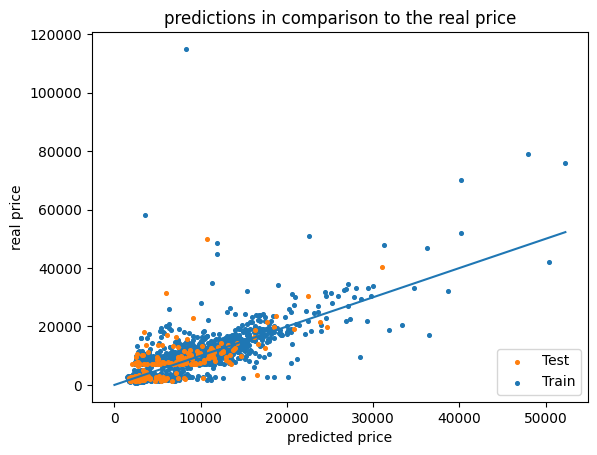

In [9]:
fig, ax = plt.subplots()

train = ax.scatter(y_pred_train, y_train, s=7, label ="Train")
test = ax.scatter(y_pred, y_test, s=7, label= "Test")

ax.plot([0,max(y_pred_train)], [0,max(y_pred_train)])
ax.set_ylabel('real price')
ax.set_xlabel('predicted price')
ax.set_title('predictions in comparison to the real price')

ax.legend(handles=[test, train], loc='lower right')

plt.show()

## Load and Test DS 2

In [6]:
ds2_path_wiki = 'data/watches/ds2_marc/cleandata.csv'
ds2_path_imdb = 'data/watches/ds2_marc/images/'
df_ds2 = pd.read_csv(ds2_path_wiki, index_col=0)

In [7]:
%%capture
### TIME INFORMATION: needs 30s on M1
y_pred_ds2, all_label_ds2 = get_predictions(df_ds2, ds2_path_imdb)

In [27]:
#
def get_price_look_ratio(array1, array2):
    filtered_array1 = []
    filtered_array2 = []
    
    ratio = []
    
    for i in range(len(array1)):
        #picture_name = df.iloc[i]["image_name"]
        predicted_price = array1[i]
        real_price = array2[i]
        
        ratio.append(predicted_price/real_price)
    
    return ratio

In [31]:
ratio = get_price_look_ratio(y_pred_ds2, all_label_ds2)
max_index = ratio.index(max(ratio))
picture_name = df_ds2.iloc[max_index]["image_name"]
print(f"With picture: {picture_name} the model predicts a price of {y_pred_ds2[max_index]}$ at a real price of {all_label_ds2[max_index]}$")

With picture: MG5407S.jpg the model predicts a price of 18401$ at a real price of 84.33$


In [ ]:
ratio = get_price_look_ratio(y_pred, all_label_ds2)
max_index = ratio.index(max(ratio))
picture_name = df_ds2.iloc[max_index]["image_name"]
print(f"With picture: {picture_name} the model predicts a price of {y_pred_ds2[max_index]}$ at a real price of {all_label_ds2[max_index]}$")

## Finding the watch that looks the most expensive but is actually cheap. 

From the previous output, it appears that the watch with the filename MG4243S.jpg is valued at 1.4 million dollar although it costs only 416.32 dolllar.

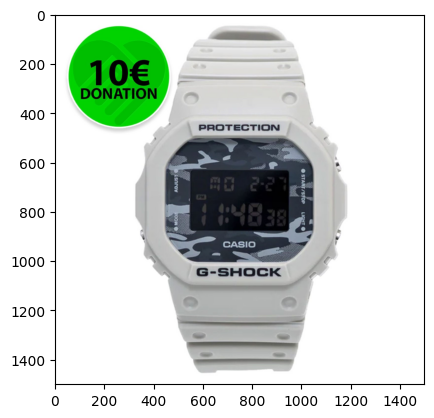

In [32]:
plt.imshow(mpimg.imread(ds2_path_imdb + '/MG5407S.jpg'))

In [11]:
print(f"The R2 score on not filtered Marc Gebauer Data is: {r2_score(all_label_ds2, y_pred_ds2)}")
print(f"The R2 score on the filtered Marc Gebauer Data is: {r2_score(all_label_ds2_FILTERED, y_pred_ds2_FILTERED)}")

The R2 score on not filtered Marc Gebauer Data is: -0.05188201206638232
The R2 score on the filtered Marc Gebauer Data is: -0.05881254689252002


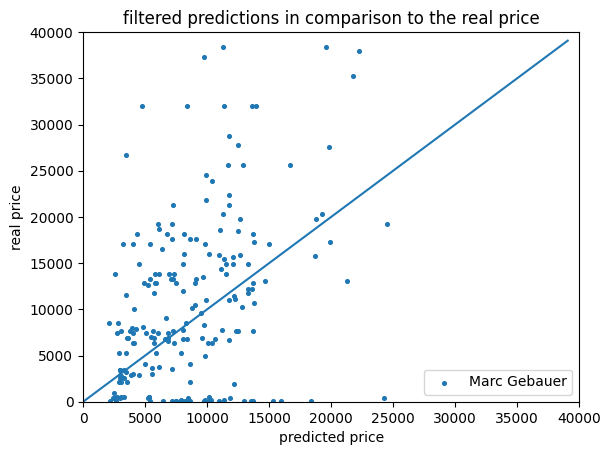

In [20]:
fig, ax = plt.subplots()

test = ax.scatter(y_pred_ds2, all_label_ds2, s=7, label ="Marc Gebauer")

ax.plot([0,max(y_pred_ds2_FILTERED)], [0,max(y_pred_ds2_FILTERED)])
ax.set_ylabel('real price')
ax.set_xlabel('predicted price')
ax.set_title('filtered predictions in comparison to the real price')

ax.legend(handles=[test], loc='lower right')
ax.set_ylim(0, 40000)  
ax.set_xlim(0, 40000)  

plt.show()